# Capstone Project : Pneumonia Detection from X-rays
### Exploratory Data Analysis

In [1]:
!pip install pydicom

     |████████████████████████████████| 35.5MB 1.3MB/s 


In [2]:
# Load the data from Google drive
from google.colab import drive
drive.mount('/content/drive/')



Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
#Set the project path 
project_path =  '/content/drive/My Drive/AIML_Delete/Capstone/'

In [0]:
import os
os.chdir(project_path)
path = '.'

In [5]:
ls

 dicom_image_description.csv              stage_2_sample_submission.csv
'GCP Credits Request Link - RSNA.txt'     stage_2_test_images/
 Mridula_Notes.gdoc                       stage_2_train_images/
 Patient_Detail.csv                       stage_2_train_labels.csv
 rsna-pneumonia-detection-challenge.zip   Training_labels_merged.csv
 stage_2_detailed_class_info.csv


In [0]:
#################DO NOT REEXECUTE ON SUBSEQUENT RUNS#########################
# extract the files from zipped directory to drive
from zipfile import ZipFile

with ZipFile(project_path+'rsna-pneumonia-detection-challenge.zip', 'r') as z:
  z.extractall()

In [0]:
import pydicom 
from pydicom.data import get_testdata_files
import matplotlib.pyplot as plt


Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 200
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.8323329.2323.1517874295.912485
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.0
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.2323.1517874295.912485
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time       

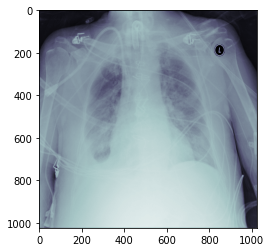

In [0]:
#################DO NOT REEXECUTE ON SUBSEQUENT RUNS#########################
#Load a sample image and print the metadata + the image
temp_path='/content/drive/My Drive/AIML_Delete/Capstone/stage_2_train_images/0a46eca3-e577-4c7f-a782-9d54754bf096.dcm'
filename = temp_path
dataset = pydicom.dcmread(filename)

# Normal mode:
print()

print(dataset)

#Matplotlib plot of the image
if 'PixelData' in dataset:
    rows = int(dataset.Rows)
    cols = int(dataset.Columns)
    print("Image size.......: {rows:d} x {cols:d}, {size:d} bytes".format(
        rows=rows, cols=cols, size=len(dataset.PixelData)))
    if 'PixelSpacing' in dataset:
        print("Pixel spacing....:", dataset.PixelSpacing)

# use .get() if not sure the item exists, and want a default value if missing
print("Slice location...:", dataset.get('SliceLocation', "(missing)"))

# plot the image using matplotlib
plt.imshow(dataset.pixel_array, cmap=plt.cm.bone)
plt.show()

In [0]:
# Code to extract the metadata from all the images and store to CSV
import pandas as pd
import csv
import cv2
folder_path="/content/drive/My Drive/AIML_Delete/Capstone/stage_2_train_images/"
images_path = os.listdir(folder_path)




In [0]:
dicom_image_description = pd.read_csv("/content/drive/My Drive/AIML_Delete/Capstone/dicom_image_description.csv")


In [0]:
#############DO NOT REEXECUTE ON SUBSEQUENT RUNS ########################################
with open('Patient_Detail.csv', 'w', newline ='') as csvfile:
    fieldnames = list(dicom_image_description["Description"])
    writer = csv.writer(csvfile, delimiter=',')
    writer.writerow(fieldnames)
    for n, image in enumerate(images_path):
        ds = pydicom.dcmread(os.path.join(folder_path, image))
        rows = []
        for field in fieldnames:
            if ds.data_element(field) is None:
                rows.append('')
            else:
                x = str(ds.data_element(field)).replace("'", "")
                y = x.find(":")
                x = x[y+2:]
                rows.append(x)
        writer.writerow(rows)

Combine the CSVs for Patient Details with Train label csv with patientID column


In [10]:
#############DO NOT REEXECUTE ON SUBSEQUENT RUNS ########################################
a = pd.read_csv("stage_2_detailed_class_info.csv")
b = pd.read_csv("stage_2_train_labels.csv")
a = a.dropna(axis=1)
merged = a.merge(b, on='PatientID')
m1=merged.drop_duplicates()
m1.shape


(30227, 7)

In [0]:
#############DO NOT REEXECUTE ON SUBSEQUENT RUNS ########################################

c = pd.read_csv("Patient_Detail.csv")
merged = c.merge(m1, on='PatientID')
merged.to_csv("Training_labels_merged.csv", index=False)

In [12]:
merged.shape

(30227, 41)

## Perform Exploratory Data Analysis on the merged training csv


In [13]:
# Read data as dataframe
medData = pd.read_csv('Training_labels_merged.csv')
medData.head()

,SpecificCharacterSet,SOPClassUID,SOPInstanceUID,StudyDate,StudyTime,AccessionNumber,Modality,ConversionType,ReferringPhysicianName,SeriesDescription,PatientName,PatientID,PatientBirthDate,PatientSex,PatientAge,BodyPartExamined,ViewPosition,StudyInstanceUID,SeriesInstanceUID,StudyID,SeriesNumber,InstanceNumber,PatientOrientation,SamplesperPixel,PhotometricInterpretation,Rows,Columns,PixelSpacing,BitsAllocated,BitsStored,HighBit,PixelRepresentation,LossyImageCompression,LossyImageCompressionMethod,PixelData,class,x,y,width,height,Target
0,ISO_IR 100,Secondary Capture Image Storage,1.2.276.0.7230010.3.1.4.8323329.3171.151787430...,19010101,0.0,NaN,CR,WSD,NaN,view: PA,f79e5a75-5e15-431a-9ba3-de64c1724b65,f79e5a75-5e15-431a-9ba3-de64c1724b65,NaN,M,59,CHEST,PA,1.2.276.0.7230010.3.1.2.8323329.3171.151787430...,1.2.276.0.7230010.3.1.3.8323329.3171.151787430...,NaN,"""1""","""1""",NaN,NaN,MONOCHROME2,1024,1024,"[0.14300000000000002, 0.14300000000000002]",8,8,7,0,1,ISO_10918_1,Array of 159576 elements,Normal,NaN,NaN,NaN,NaN,0
1,ISO_IR 100,Secondary Capture Image Storage,1.2.276.0.7230010.3.1.4.8323329.26568.15178744...,19010101,0.0,NaN,CR,WSD,NaN,view: PA,f79fa94e-8886-425c-95d4-81abfea92aee,f79fa94e-8886-425c-95d4-81abfea92aee,NaN,F,43,CHEST,PA,1.2.276.0.7230010.3.1.2.8323329.26568.15178744...,1.2.276.0.7230010.3.1.3.8323329.26568.15178744...,NaN,"""1""","""1""",NaN,NaN,MONOCHROME2,1024,1024,"[0.168, 0.168]",8,8,7,0,1,ISO_10918_1,Array of 109446 elements,Normal,NaN,NaN,NaN,NaN,0
2,ISO_IR 100,Secondary Capture Image Storage,1.2.276.0.7230010.3.1.4.8323329.22227.15178744...,19010101,0.0,NaN,CR,WSD,NaN,view: AP,f79fc759-fde0-4e2e-8951-26ac8af5ef89,f79fc759-fde0-4e2e-8951-26ac8af5ef89,NaN,F,45,CHEST,AP,1.2.276.0.7230010.3.1.2.8323329.22227.15178744...,1.2.276.0.7230010.3.1.3.8323329.22227.15178744...,NaN,"""1""","""1""",NaN,NaN,MONOCHROME2,1024,1024,"[0.168, 0.168]",8,8,7,0,1,ISO_10918_1,Array of 107838 elements,Lung Opacity,613.0,241.0,169.0,479.0,1
3,ISO_IR 100,Secondary Capture Image Storage,1.2.276.0.7230010.3.1.4.8323329.22227.15178744...,19010101,0.0,NaN,CR,WSD,NaN,view: AP,f79fc759-fde0-4e2e-8951-26ac8af5ef89,f79fc759-fde0-4e2e-8951-26ac8af5ef89,NaN,F,45,CHEST,AP,1.2.276.0.7230010.3.1.2.8323329.22227.15178744...,1.2.276.0.7230010.3.1.3.8323329.22227.15178744...,NaN,"""1""","""1""",NaN,NaN,MONOCHROME2,1024,1024,"[0.168, 0.168]",8,8,7,0,1,ISO_10918_1,Array of 107838 elements,Lung Opacity,276.0,248.0,168.0,477.0,1
4,ISO_IR 100,Secondary Capture Image Storage,1.2.276.0.7230010.3.1.4.8323329.7714.151787433...,19010101,0.0,NaN,CR,WSD,NaN,view: PA,f7a169e2-a1a7-439a-ab83-0d34cf5ae4b9,f7a169e2-a1a7-439a-ab83-0d34cf5ae4b9,NaN,M,52,CHEST,PA,1.2.276.0.7230010.3.1.2.8323329.7714.151787433...,1.2.276.0.7230010.3.1.3.8323329.7714.151787433...,NaN,"""1""","""1""",NaN,NaN,MONOCHROME2,1024,1024,"[0.14300000000000002, 0.14300000000000002]",8,8,7,0,1,ISO_10918_1,Array of 156654 elements,Normal,NaN,NaN,NaN,NaN,0


In [14]:
medData.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
SpecificCharacterSet,30227,1,ISO_IR 100,30227,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SOPClassUID,30227,1,Secondary Capture Image Storage,30227,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SOPInstanceUID,30227,26684,1.2.276.0.7230010.3.1.4.8323329.25927.15178744...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StudyDate,30227,NaN,NaN,NaN,1.90101e+07,0,1.90101e+07,1.90101e+07,1.90101e+07,1.90101e+07,1.90101e+07
StudyTime,30227,NaN,NaN,NaN,0,0,0,0,0,0,0
AccessionNumber,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Modality,30227,1,CR,30227,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ConversionType,30227,1,WSD,30227,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ReferringPhysicianName,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeriesDescription,30227,2,view: AP,15297,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
medData.shape


(30227, 41)

Too many columns to analyse.. Dropping some unnecessary columns from dataframe

In [0]:
df=medData.drop(['StudyID','PatientOrientation','PatientBirthDate','SamplesperPixel','AccessionNumber','ReferringPhysicianName','PatientBirthDate','PatientName','PhotometricInterpretation','PixelSpacing','PixelData','Rows','Columns','SpecificCharacterSet','SOPClassUID','SOPInstanceUID','StudyDate','StudyTime','ConversionType','SeriesDescription','StudyInstanceUID','SeriesInstanceUID','SeriesNumber','InstanceNumber','BitsAllocated','BitsStored','HighBit','PixelRepresentation','LossyImageCompression','LossyImageCompressionMethod'],axis=1)

In [23]:
df.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Modality,30227,1,CR,30227,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PatientID,30227,26684,7d674c82-5501-4730-92c5-d241fd6911e7,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PatientSex,30227,2,M,17216,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PatientAge,30227,NaN,NaN,NaN,46.7978,16.8929,1,34,49,59,155
BodyPartExamined,30227,1,CHEST,30227,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ViewPosition,30227,2,AP,15297,NaN,NaN,NaN,NaN,NaN,NaN,NaN
class,30227,3,No Lung Opacity / Not Normal,11821,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x,9555,NaN,NaN,NaN,394.048,204.574,2,207,324,594,835
y,9555,NaN,NaN,NaN,366.84,148.94,2,249,365,478.5,881
width,9555,NaN,NaN,NaN,218.471,59.2895,40,177,217,259,528


In [0]:
#Checking for duplicated rows

In [25]:
duplicateDFRow = df[df.duplicated()]
print(duplicateDFRow)

Empty DataFrame
Columns: [Modality, PatientID, PatientSex, PatientAge, BodyPartExamined, ViewPosition, class, x, y, width, height, Target]
Index: []


There are no duplicate rows. The number of rows is greater in than the actual number of X-rays by ~4000 , but this is due to some patients having multiple infected aread in the lungs ,thus needing more than one bounding boxes to be defined

In [0]:
import seaborn as sns

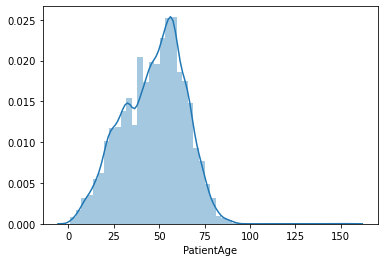

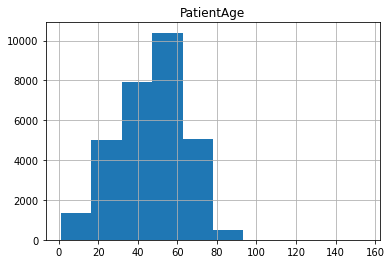

In [27]:
#Plotting a histogram of age distribution of Patients
sns.distplot(df['PatientAge'])
df.hist('PatientAge')
plt.show()

Maximum number of patients are above 50 years of age

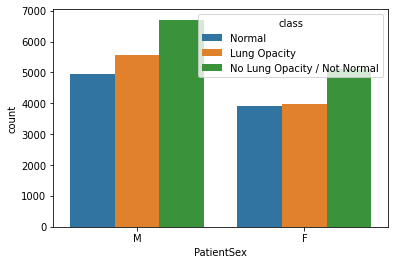

In [29]:
#Checking for the division of pneumonia patients with respect to their sex
sns.countplot(x='PatientSex',hue='class',data=df)


Number of male patients is higher and hence there is a slight class imbalance in the numbers

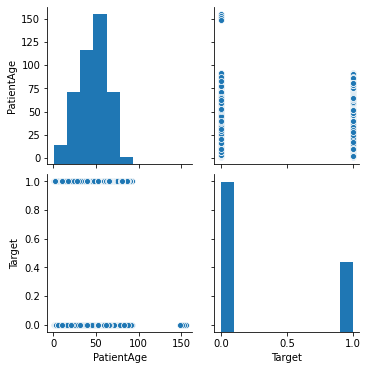

In [30]:
# Check for the depedance of Age of Patients with Pneumonia Outcome
sns.pairplot(df,vars=['PatientAge','Target'])

No clear dependency seen in the outcome from the pair-plot

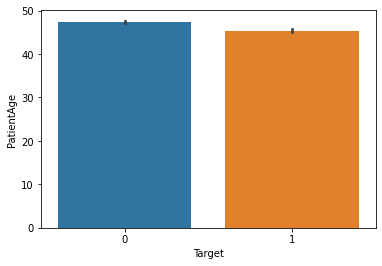

In [33]:
#Barplot to give a clear understanding of the patients with pneumonia outcome with respect to age
sns.barplot(x='Target',y='PatientAge',data=df)

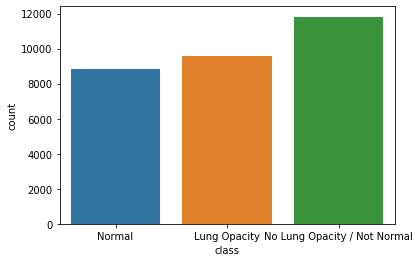

In [34]:
# Checking for the split of detailed classifications in the training set
sns.countplot(x='class',data=df)


The number of patients who show no concusive signs of pneumonia ,but have some abnormalities in the x-rays is more in the dataset. Conclusive pneumonia and non-pneumonia patients are almost equal in the set


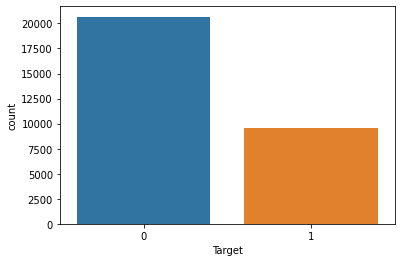

In [36]:
# Checking for the split of pneumonia Positive and negative cases in the dataset

sns.countplot(x='Target',data=df)

Almost 1/3rd of the samples is of Pneumonia positive patients and 2/3rd are pneumonia negative patients